# Ingeniería de características

Autora: Beatriz Ibarra Mendoza  
Última actualización: 31/10/2023  


Este notebook analiza datos relacionados con los empleados de una empresa y variables potencialmente relacionadas con la tasa de deserción. El procesamiento de la información incluye la implementación de ingeniería de características para optimizar la base de datos. El análisis y visualización son realizados con Pandas y Matplotlib, respectivamente. El notebook incluye lo siguiente:  
* *Introducción* al problema y *descripción* de los datos.  
* *Instalación* de las paqueterías.  
* *Exploración* de datos.  
* Etapa 1: *valores faltantes*.  
* Etapa 2: *ingeniería de características*.  
* Etapa 3: *reducción de dimensionalidad*.  
* *Conclusiones generales*.





### Introducción al problema y descripción de los datos

Actualmente, la deserción de los empleados es un problema que implica costos importantes para las empresas. Para entender y predecir la causa de esta deserción, los equipos de RH en conjunto con científicos de datos se proponen analizar datos relacionados con los empleados para encontrar patrones o correlaciones relevantes que permitan implementar planes de acción y así, evitar la deserción o contener los efectos asociados a este problema.
En este sentido, la cantidad y calidad de los datos con los que se va a trabajar es fundamental. Por ello, se realizará un proyecto de ingeniería de características que permitirá entregar dos conjuntos de datos con la calidad y dimensiones adecuadas para los análisis estadísticos o de machine learning pertinentes.

Los datos para este proyecto corresponden al set 'Attrition rate' de Kaggle e incluyen variables relacionadas con los empleados:  
- ID único para cada empleado (Employee_ID).  
- Edad de los empleados (Age).  
- Departamente en el que se desempeña cada empleado (Unit).  
- Nivel educativo en una escala de 1-5 (Education).
- Género (Gender).  
- Habilidad en la toma de decisiones (Decision_skill_possess).  
- Nivel de puesto (Post_Level).  
- Estado civil (Relationship_Status).  
- Pago en una escala de 1 a 10 (Pay_Scale).  
- Años de servicio en la empresa (Time_of_service).
-Tasa de crecimiento en la empresa (Growth_rate).  
- Años desde la última promoción en la empresa (Time_since_promotion).  
- Evaluación del empleado sobre su balance entre el trabajo y su vida personal (Work_life_balance).   
- Puntuación de viaje en una escala de 1 a 3 (Travel_rate).  
- Ciudad en la que se encuentra (Hometown).  
- Beneficios y compensaciones (Compensation_and_Benefits).  
- Tasa de deserción calculada para cada empleado (Attrition_rate).  
- Variables anónimas (VAR1-VAR5).  




### Instalación

In [ ]:
# Paqueterías
import pandas as pd
import matplotlib.pyplot as plt

### Exploración de datos

In [ ]:
# Carga y lectura de datos
employees = pd.read_csv('/content/employees_att.csv')
employees.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,0.1827


In [ ]:
# Dimensión de los datos
employees.shape

(7000, 17)

In [ ]:
# Atributos del conjunto de datos
employees.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'Attrition_rate'],
      dtype='object')

In [ ]:
# Tipo de datos
employees.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
Attrition_rate               float64
dtype: object

### Etapa 1: Valores faltantes

In [ ]:
# Detección de valores perdidos por columna.
pd.isna(employees).sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
Attrition_rate                 0
dtype: int64

Las columnas que tienen datos faltantes son edad (Age, 412 datos), años de servicio (Time_of_service, 144 datos), escala de pago (Pay_Scale, 9 datos) y balance vida personal / trabajo (Work_Life_balance, 11 datos).  
A continuación las decisiones sobre el manejo de datos faltantes:

#### Edad

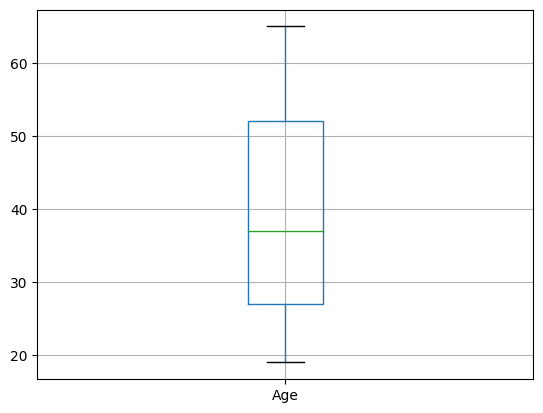

In [ ]:
# Identificar el rango de valores y verificar outliers.
employees.boxplot(column=['Age'])
plt.show()
# No hay valores atípicos. La mayor edad es de 65 y la menor de 19.

In [ ]:
# En boxplot se observa que los datos aparentemente se distribuyen de forma normal.
# Hay un ligero sesgo hacia la izquierda. Para confirmar se propone realizar una prueba Shapiro.

from scipy.stats import shapiro
import numpy as np

stat, p_value = shapiro(employees['Age'])
print('El valor de p es:', p_value) # > 0.05, los datos son normales.


El valor de p es: 1.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Como los datos tienen una distribución normal y no hay outliers, una opción razonable de imputación es la media.
employees['Age'].fillna(employees['Age'].mean(), inplace=True)
employees.isnull().sum() # Confirmación

Employee_ID                    0
Gender                         0
Age                            0
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
Attrition_rate                 0
dtype: int64

#### Tiempo de servicio

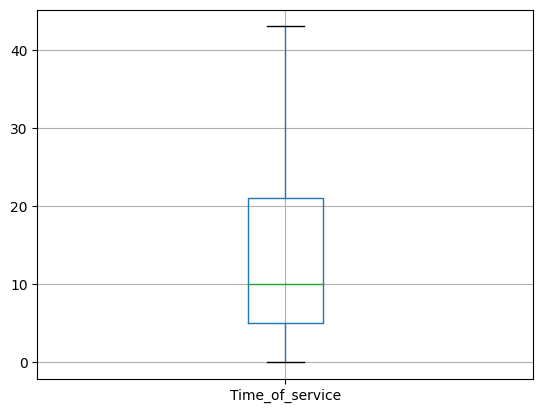

In [ ]:
# Identificar el rango de valores y verificar outliers.
employees.boxplot(column=['Time_of_service'])
plt.show()
# No hay valores atípicos. El mayor tiempo de servicio es de 43 años.

In [ ]:
employees['Time_of_service'].max()

43.0

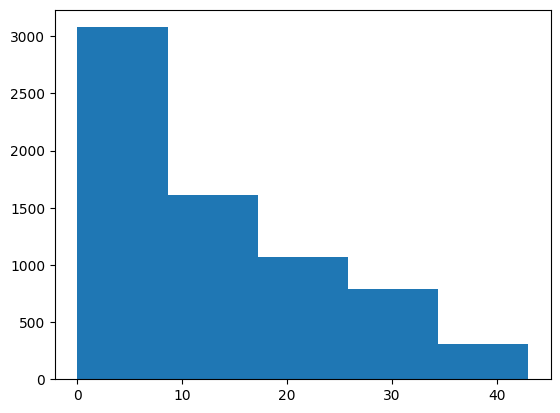

In [ ]:
# Determinar la distribución de los datos.
plt.hist(employees.Time_of_service, bins=5)
plt.show()
# Los datos están sesgados hacia la izquierda, entre los 0 y 10 años de servicio.

In [ ]:
# Como los datos tienen un sesgo hacia la izquierda y no hay outliers, se propone imputar por mediana.
# Esta decisión es justificable para datos sesgados, ya que la mediana no se afecta por la asimetría de la distribución.
employees['Time_of_service'].fillna(employees['Time_of_service'].median(), inplace=True)
employees.isnull().sum() # Confirmación

Employee_ID                   0
Gender                        0
Age                           0
Education_Level               0
Relationship_Status           0
Hometown                      0
Unit                          0
Decision_skill_possess        0
Time_of_service               0
Time_since_promotion          0
growth_rate                   0
Travel_Rate                   0
Post_Level                    0
Pay_Scale                     9
Compensation_and_Benefits     0
Work_Life_balance            11
Attrition_rate                0
dtype: int64

#### Escala de pago

In [ ]:
# Explorar datos únicos en esta columna.
employees['Pay_Scale'].unique()

array([ 7.,  6.,  8.,  2.,  9.,  5.,  4.,  3., 10.,  1., nan])

In [ ]:
# Dado que los valores se encuentran en una escala del 1 al 10, se realiza imputación por moda.
moda_pay_scale = employees['Pay_Scale'].mode()[0]
employees['Pay_Scale'].fillna(moda_pay_scale, inplace=True)
employees.isnull().sum() # Confirmación

Employee_ID                   0
Gender                        0
Age                           0
Education_Level               0
Relationship_Status           0
Hometown                      0
Unit                          0
Decision_skill_possess        0
Time_of_service               0
Time_since_promotion          0
growth_rate                   0
Travel_Rate                   0
Post_Level                    0
Pay_Scale                     0
Compensation_and_Benefits     0
Work_Life_balance            11
Attrition_rate                0
dtype: int64

#### Balance vida personal y trabajo

In [ ]:
# Explorar datos únicos en esta columna.
employees['Work_Life_balance'].unique()

array([ 3.,  4.,  1.,  2.,  5., nan])

In [ ]:
# Dado que los valores se encuentran en una escala del 1 al 5, se realiza imputación por moda.
moda_balance = employees['Work_Life_balance'].mode()[0]
employees['Work_Life_balance'].fillna(moda_balance, inplace=True)
employees.isnull().sum() # Confirmación

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
Attrition_rate               0
dtype: int64

### Etapa 2: Ingeniería de características

#### Valores atípicos

In [ ]:
employees.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7000.0,39.622799,13.200357,19.0,28.0000,39.622799,51.000,65.0000
Education_Level,7000.0,3.187857,1.065102,1.0,3.0000,3.000000,4.000,5.0000
Time_of_service,7000.0,13.315429,10.268266,0.0,5.0000,10.000000,20.000,43.0000
Time_since_promotion,7000.0,2.367143,1.149395,0.0,1.0000,2.000000,3.000,4.0000
growth_rate,7000.0,47.064286,15.761406,20.0,33.0000,47.000000,61.000,74.0000
Travel_Rate,7000.0,0.817857,0.648205,0.0,0.0000,1.000000,1.000,2.0000
Post_Level,7000.0,2.798000,1.163721,1.0,2.0000,3.000000,3.000,5.0000
Pay_Scale,7000.0,6.008857,2.058352,1.0,5.0000,6.000000,8.000,10.0000
Work_Life_balance,7000.0,2.385714,1.123250,1.0,1.0000,2.000000,3.000,5.0000
Attrition_rate,7000.0,0.189376,0.185753,0.0,0.0704,0.142650,0.235,0.9959


De acuerdo con la tabla anterior, aparentemente no hay valores atípicos. Para confirmar se realizarán boxplots de la variables.
Nota: Las variables Edad ('Age') y años de servicio ('Time_of_service') ya fueron analizadas para valores atípicos.

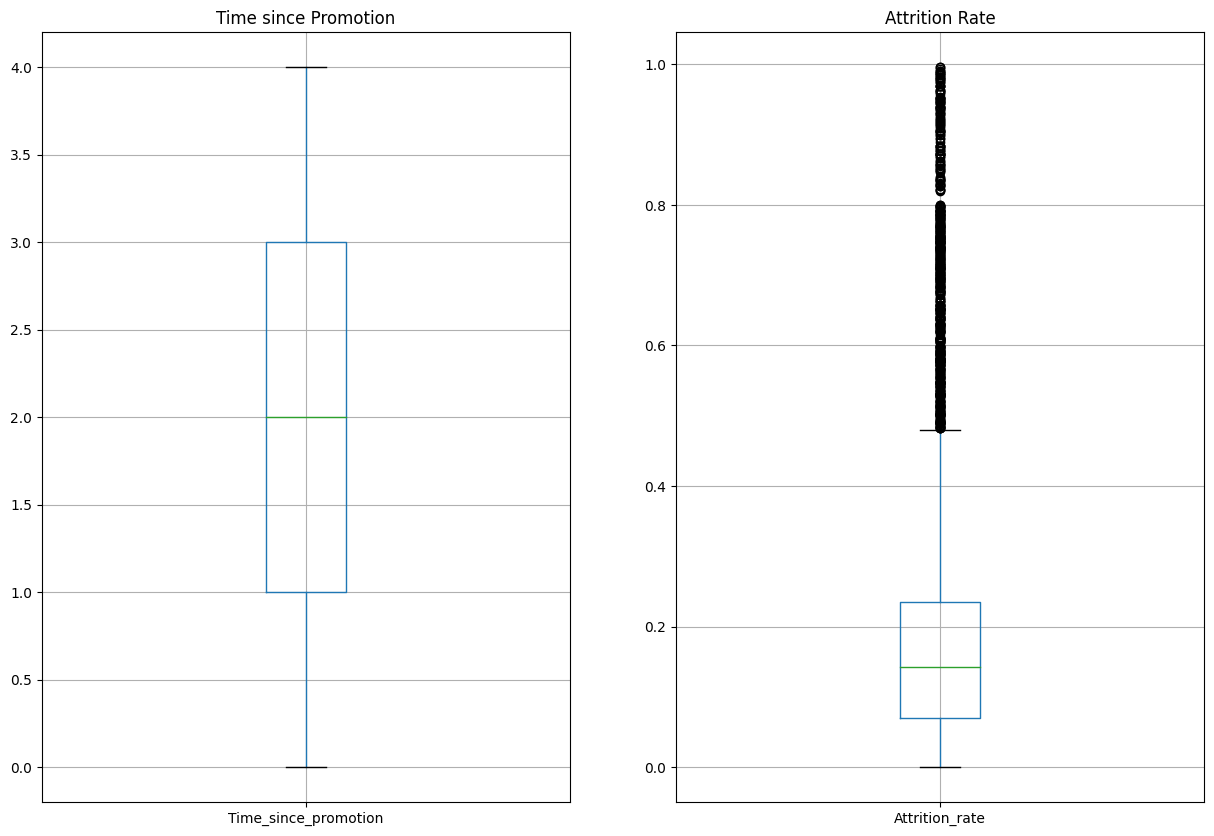

In [ ]:
# Boxplots
fig, axs = plt.subplots(1,2, figsize=(15,10))
employees.boxplot(['Time_since_promotion'], ax=axs[0])
axs[0].set_title('Time since Promotion')
employees.boxplot(['Attrition_rate'], ax=axs[1])
axs[1].set_title('Attrition Rate')

plt.show()

La variable Tiempo desde promoción ('Time_since_promotion') no tiene outliers, sin embargo, la tasa de deserción ('Attrition_rate') si. A continuación el procedimiento para corregirlos.

In [ ]:
# Exploración de datos que contienen outliers.
employees = employees[(employees['Attrition_rate']<0.5)]
employees

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,EID_12529,M,33.0,4,Married,Franklin,Logistics,Directive,7.0,4,66,2,4,6.0,type3,2.0,0.2569
6994,EID_11159,M,33.0,3,Married,Springfield,Accounting and Finance,Behavioral,9.0,3,34,0,1,8.0,type2,4.0,0.0480
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,0,2,4.0,type3,3.0,0.1055
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,1,5,8.0,type0,2.0,0.4162


In [ ]:
# Tratamiento de outliers con obtención de límites y desviación estándar.
factor = 2
upper_lim = employees['Attrition_rate'].mean() + employees['Attrition_rate'].std()*factor
print(upper_lim)
lower_lim = employees['Attrition_rate'].mean() - employees['Attrition_rate'].std()*factor
print(lower_lim)

0.3427955168520084
-0.05635334442748302


In [ ]:
# Nuevo set, excluye valores fuera de los límites.
employees2 = employees[(employees['Attrition_rate'] < upper_lim) & (employees['Attrition_rate'] > lower_lim)]
employees2.shape

(6165, 17)

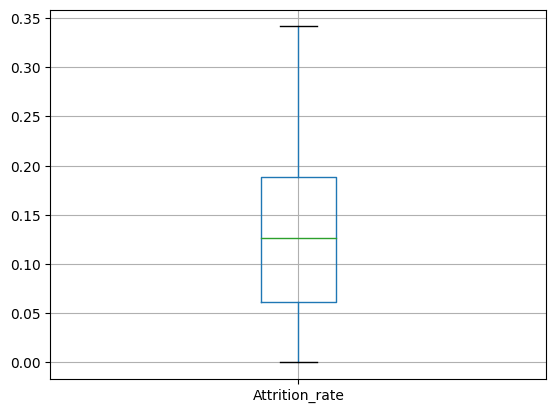

In [ ]:
# Corroborar outliers de variable 'Attrition_rate'.
employees2.boxplot(['Attrition_rate'])
plt.show()

#### Análisis de variables (one hot encoding)

In [ ]:
# Exploración del tipo de variables (como se realizó en la descripción de datos).
employees2.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
Attrition_rate               float64
dtype: object

Las variables que podemos considerar para aplicar 'One hot encoding (OHE)' son:  
- Identificador de empleado (Employee_ID): No es una variable categórica convencional (cada valor es único), no se aplicará OHE.  
- Género (Gender): Es una variable categórica nominal, por lo tanto se aplicará OHE.  
- Estado civil (Relationship_Status): Es una variable categórica nominal, por lo tanto se aplicará OHE.  
- Ciudad (Hometown): Esta variable incluye 5 categorías distintas, pero como no tienen una jerarquía inherente, se aplicará OHE.  
- Área de la empresa (Unit): Esta variable incluye 11 categorías distintas e independientes, no tienen una jerarquía inherente, se aplicará OHE.    
- Habilidades de decisión (Decision_skill_possess): Esta variable incluye 4 categorías distintas e independientes, además no tienen un orden jerárquico explícito, por lo que se aplicará OHE.  
- Compensación y beneficios (Compensation_and_Benefits): Esta variable tiene 5 categorías distintas e independientes, sin embargo, no es explícito si los tipos de beneficios van en orden del 0 (type0) al 4 (type4). Si hubiera un orden jerárquico entre ellos, se convertirían en variables categóricas ordinales y no sería pertinente realizar OHE.
Si fuera un caso real, para esta variable consultaría con el personal de RH para entender si tienen o no un orden. Pero para este ejercicio se aplicará OHE.

In [ ]:
employees2['Relationship_Status'].unique()

array(['Married', 'Single'], dtype=object)

In [ ]:
employees2['Hometown'].unique()

array(['Franklin', 'Springfield', 'Clinton', 'Lebanon', 'Washington'],
      dtype=object)

In [ ]:
employees2['Unit'].unique()

array(['IT', 'Logistics', 'Quality', 'Human Resource Management',
       'Purchasing', 'Sales', 'Production', 'Operarions',
       'Accounting and Finance', 'R&D', 'Marketing', 'Security'],
      dtype=object)

In [ ]:
employees2['Decision_skill_possess'].unique()

array(['Conceptual', 'Analytical', 'Behavioral', 'Directive'],
      dtype=object)

In [ ]:
employees2['Compensation_and_Benefits'].unique()

array(['type2', 'type3', 'type0', 'type4', 'type1'], dtype=object)

In [ ]:
employees2.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,0.1827


In [ ]:
# Generar un dataset con las variables categóricas a procesar.
categorical_var = employees2[['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']]
categorical_var.head()

,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,F,Married,Franklin,IT,Conceptual,type2
1,M,Single,Springfield,Logistics,Analytical,type2
2,F,Married,Clinton,Quality,Conceptual,type2
3,F,Single,Lebanon,Human Resource Management,Behavioral,type2
4,F,Married,Springfield,Logistics,Conceptual,type3


In [ ]:
# Aplicar one hot encoding.
categorical_var = pd.get_dummies(categorical_var, drop_first=True)
categorical_var

,Gender_M,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,...,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6993,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
6994,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6996,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
# Crear df con las variables numéricas.
numerical_var = employees2[['Employee_ID', 'Age', 'Education_Level', 'Time_of_service',
                            'Time_since_promotion', 'growth_rate', 'Travel_Rate',
                            'Post_Level', 'Pay_Scale',
                            'Work_Life_balance', 'Attrition_rate']]
numerical_var.head()

,Employee_ID,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate
0,EID_23371,42.0,4,4.0,4,33,1,1,7.0,3.0,0.1841
1,EID_18000,24.0,3,5.0,4,36,0,3,6.0,4.0,0.0670
2,EID_3891,58.0,3,27.0,3,51,0,2,8.0,1.0,0.0851
3,EID_17492,26.0,3,4.0,3,56,1,3,8.0,1.0,0.0668
4,EID_22534,31.0,1,5.0,4,62,1,3,2.0,3.0,0.1827


#### Análisis de variables (binning)

Para identificar cuáles variables han sido potencialmente agrupadas (binneadas) se utilizarán varias aproximaciones: a) análisis visual, b) análisis estadístico (uniformidad de valores) y c) análisis de intervalos.  
Nota: solo se analizarán las variables que no tienen datos en formato de escalas (e.g. 'Education_Level').

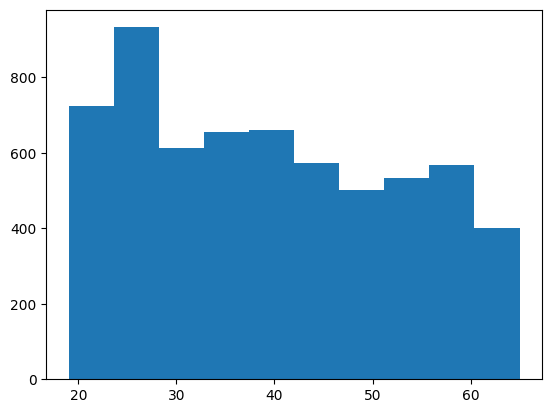

In [ ]:
# Análisis visual con histogramas.
plt.hist(employees2.Age) # no se indicó un número exacto de bins para ver si por default hay una agrupación con más frecuencias.
plt.show()

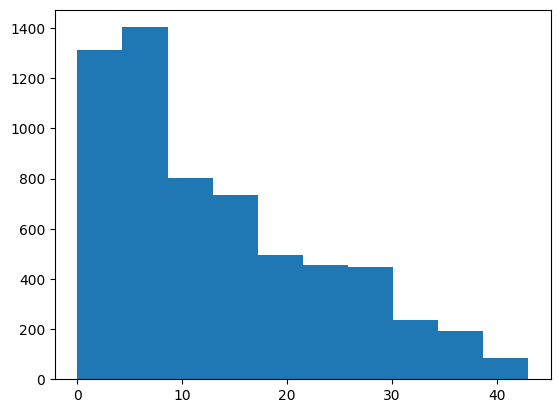

In [ ]:
plt.hist(employees2.Time_of_service)
plt.show()

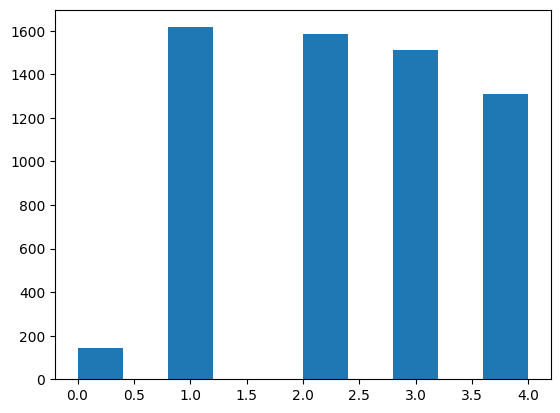

In [ ]:
plt.hist(employees2.Time_since_promotion)
plt.show()

In [ ]:
# Análisis estadístico.
employees2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6165.0,39.636974,13.197973,19.0,28.000,39.622799,51.0000,65.0000
Education_Level,6165.0,3.193674,1.061444,1.0,3.000,3.000000,4.0000,5.0000
Time_of_service,6165.0,13.328143,10.271218,0.0,5.000,10.000000,20.0000,43.0000
Time_since_promotion,6165.0,2.361882,1.148853,0.0,1.000,2.000000,3.0000,4.0000
growth_rate,6165.0,47.024818,15.751473,20.0,33.000,47.000000,61.0000,74.0000
Travel_Rate,6165.0,0.821736,0.646596,0.0,0.000,1.000000,1.0000,2.0000
Post_Level,6165.0,2.794647,1.159842,1.0,2.000,3.000000,3.0000,5.0000
Pay_Scale,6165.0,6.018978,2.062252,1.0,5.000,6.000000,8.0000,10.0000
Work_Life_balance,6165.0,2.375182,1.124415,1.0,1.000,2.000000,3.0000,5.0000
Attrition_rate,6165.0,0.131527,0.083234,0.0,0.061,0.126000,0.1885,0.3416


In [ ]:
# Análisis de intervalos.
employees2['Age'].value_counts()

39.622799    366
25.000000    211
22.000000    205
27.000000    202
37.000000    193
31.000000    190
26.000000    189
35.000000    187
54.000000    184
52.000000    183
60.000000    181
45.000000    170
28.000000    167
47.000000    167
24.000000    164
30.000000    164
42.000000    164
32.000000    156
21.000000    148
19.000000    135
65.000000    133
23.000000    128
59.000000    115
58.000000    110
20.000000    108
29.000000    104
50.000000     94
33.000000     92
36.000000     92
34.000000     91
46.000000     89
55.000000     88
51.000000     87
64.000000     85
56.000000     82
49.000000     82
57.000000     80
53.000000     79
43.000000     78
41.000000     77
40.000000     76
44.000000     73
39.000000     72
48.000000     71
38.000000     70
63.000000     65
62.000000     63
61.000000     55
Name: Age, dtype: int64

In [ ]:
employees2['Time_of_service'].value_counts()

6.0     481
5.0     446
3.0     414
4.0     385
10.0    310
2.0     259
8.0     251
7.0     225
9.0     176
13.0    170
12.0    164
15.0    158
14.0    155
11.0    153
18.0    143
0.0     143
16.0    142
22.0    133
21.0    124
20.0    123
1.0     113
24.0    111
17.0    109
23.0    108
19.0    105
28.0    103
25.0    102
26.0     96
27.0     95
30.0     83
31.0     75
29.0     70
33.0     62
35.0     57
32.0     56
36.0     48
34.0     45
37.0     44
38.0     42
39.0     25
40.0     22
41.0     17
42.0     14
43.0      8
Name: Time_of_service, dtype: int64

In [ ]:
employees2['Time_since_promotion'].value_counts()

1    1616
2    1584
3    1511
4    1311
0     143
Name: Time_since_promotion, dtype: int64

Conclusiones sobre binning:  
De las variables analizadas mediante los enfoques mencionados, el tiempo desde promoción ('Time_since_promotion), es la que muestra valores binneados. Los datos fueron divididos en 5 grupos principales (0,1,2,3,4), esto puede determinarse fácilmente con el histograma y se confirma con la función value_counts(). Además, los valores del análisis estadístico también tiene características contundentes al respecto, por ejemplo, la desviación estándar es muy baja y los valores máximo y mínimo se muestran como enteros.

### Etapa 3: Reducción de dimensionalidad

#### PCA

In [ ]:
# Librerías
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Los datos a utilizar son las variables del dataset employees2 (previamente depurado de outliers).
employees2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6165 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                6165 non-null   object 
 1   Gender                     6165 non-null   object 
 2   Age                        6165 non-null   float64
 3   Education_Level            6165 non-null   int64  
 4   Relationship_Status        6165 non-null   object 
 5   Hometown                   6165 non-null   object 
 6   Unit                       6165 non-null   object 
 7   Decision_skill_possess     6165 non-null   object 
 8   Time_of_service            6165 non-null   float64
 9   Time_since_promotion       6165 non-null   int64  
 10  growth_rate                6165 non-null   int64  
 11  Travel_Rate                6165 non-null   int64  
 12  Post_Level                 6165 non-null   int64  
 13  Pay_Scale                  6165 non-null   float

In [ ]:
# Análisis de media.
print('Media de cada variable:')
employees2.mean()

Media de cada variable:


Age                     39.636974
Education_Level          3.193674
Time_of_service         13.328143
Time_since_promotion     2.361882
growth_rate             47.024818
Travel_Rate              0.821736
Post_Level               2.794647
Pay_Scale                6.018978
Work_Life_balance        2.375182
Attrition_rate           0.131527
dtype: float64

In [ ]:
# Análisis de desviación estándar.
print('Desviación estándar de cada variable:')
employees2.std()

Desviación estándar de cada variable:


Age                     13.197973
Education_Level          1.061444
Time_of_service         10.271218
Time_since_promotion     1.148853
growth_rate             15.751473
Travel_Rate              0.646596
Post_Level               1.159842
Pay_Scale                2.062252
Work_Life_balance        1.124415
Attrition_rate           0.083234
dtype: float64

In [ ]:
# Análisis de varianza.
print('Varianza de cada variable:')
employees2.var()

Varianza de cada variable:


Age                     174.186503
Education_Level           1.126663
Time_of_service         105.497918
Time_since_promotion      1.319864
growth_rate             248.108891
Travel_Rate               0.418087
Post_Level                1.345234
Pay_Scale                 4.252884
Work_Life_balance         1.264309
Attrition_rate            0.006928
dtype: float64

Como los valores de media y varianza no corresponden a los requerimientos (0 y 1, respectivamente), se realizará escalamiento/estandarización de los datos.

In [ ]:
# Generar el escalar.
escalar = StandardScaler()
features = ['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion',
            'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale',
            'Work_Life_balance', 'Attrition_rate']
x = employees2.loc[:, features]
y = employees2[['Gender', 'Relationship_Status', 'Hometown', 'Unit',
                'Decision_skill_possess', 'Compensation_and_Benefits']]

In [ ]:
x.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate
0,42.0,4,4.0,4,33,1,1,7.0,3.0,0.1841
1,24.0,3,5.0,4,36,0,3,6.0,4.0,0.0670
2,58.0,3,27.0,3,51,0,2,8.0,1.0,0.0851
3,26.0,3,4.0,3,56,1,3,8.0,1.0,0.0668
4,31.0,1,5.0,4,62,1,3,2.0,3.0,0.1827


In [ ]:
y.head() # Variables categóricas.

,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,F,Married,Franklin,IT,Conceptual,type2
1,M,Single,Springfield,Logistics,Analytical,type2
2,F,Married,Clinton,Quality,Conceptual,type2
3,F,Single,Lebanon,Human Resource Management,Behavioral,type2
4,F,Married,Springfield,Logistics,Conceptual,type3


In [ ]:
# Estandarización de datos.
data_scaled = escalar.fit(x) # Calcula media y desviación estándar.
data_scaled = escalar.transform(x) # Transformación de datos reales a estandarizados.
data_scaled

array([[ 0.17905914,  0.75971169, -0.90825639, ...,  0.4757427 ,
         0.55572732,  0.63167893],
       [-1.18489724, -0.18247752, -0.81088906, ..., -0.00920336,
         1.44515071, -0.7753162 ],
       [ 1.3914648 , -0.18247752,  1.3311923 , ...,  0.96068876,
        -1.22311947, -0.55783873],
       ...,
       [-0.50291905, -0.18247752, -0.42141972, ...,  0.96068876,
         1.44515071, -1.00360747],
       [ 0.33060984, -2.06685596,  0.26015162, ..., -0.97909548,
         0.55572732, -0.312726  ],
       [ 1.3914648 , -0.18247752,  0.84435563, ..., -0.49414942,
         0.55572732, -0.48694829]])

In [ ]:
# Modelo PCA.
pca_model = PCA(n_components=10)
pca_model.fit(data_scaled)

PCA(n_components=10)

In [ ]:
# Matriz de loadings de los componentes principales.
pca_model.components_

array([[ 6.91745656e-01, -1.00528559e-02,  6.90687758e-01,
         2.07183373e-01,  1.25286991e-03,  7.80252354e-03,
         9.06192284e-03,  2.52194712e-02,  9.28056671e-03,
        -2.33589463e-02],
       [-4.86433695e-03, -3.18628312e-01, -4.64806211e-03,
         3.02976467e-02, -1.51079758e-01, -5.62667479e-02,
        -5.51288027e-01, -4.23259623e-01,  4.97194210e-01,
        -3.75835689e-01],
       [ 3.77896837e-02, -3.25799780e-01,  3.94542525e-02,
        -3.49551431e-01, -4.21913061e-01,  4.74527306e-01,
         4.42954833e-01,  1.82759099e-01,  3.67893892e-01,
        -2.32598312e-02],
       [-1.64395958e-02, -2.62392401e-01, -2.54942826e-02,
         1.50938437e-01,  6.23144155e-01,  6.08849513e-01,
         8.99699137e-02, -3.60711589e-01, -8.04744453e-02,
         6.12997401e-02],
       [ 7.54394440e-03,  2.61568554e-01, -5.90948879e-03,
         1.26643900e-01, -1.73487612e-01, -5.36155116e-02,
         1.04829513e-01, -4.61225991e-01,  3.70583392e-01,
         7.

In [ ]:
# Se convierte el arreglo a df para añadir las etiquetas de los ejes.
pd.DataFrame(
    data = pca_model.components_,
    columns = x.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
)

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate
PC1,0.691746,-0.010053,0.690688,0.207183,0.001253,0.007803,0.009062,0.025219,0.009281,-0.023359
PC2,-0.004864,-0.318628,-0.004648,0.030298,-0.151080,-0.056267,-0.551288,-0.423260,0.497194,-0.375836
PC3,0.037790,-0.325800,0.039454,-0.349551,-0.421913,0.474527,0.442955,0.182759,0.367894,-0.023260
PC4,-0.016440,-0.262392,-0.025494,0.150938,0.623144,0.608850,0.089970,-0.360712,-0.080474,0.061300
PC5,0.007544,0.261569,-0.005909,0.126644,-0.173488,-0.053616,0.104830,-0.461226,0.370583,0.722100
PC6,-0.031036,-0.692783,-0.018737,0.146322,0.188344,-0.321477,-0.094558,0.376105,0.116267,0.441126
PC7,-0.001132,0.399406,-0.008140,-0.040904,0.473302,0.052312,-0.061621,0.426624,0.648892,-0.071532
PC8,0.006145,-0.122685,0.000985,-0.043891,0.250264,-0.526384,0.651615,-0.312144,0.166030,-0.306054
PC9,-0.134164,0.018892,-0.145914,0.877536,-0.242136,0.121801,0.208164,0.151701,0.106652,-0.197729
PC10,-0.707606,0.008948,0.706384,0.008390,0.002469,0.004991,0.005768,-0.007866,0.006205,0.000379


Interpretación (resumida) sobre la información que recogen los componentes principales (PC) de forma mayoritaria:  
- PC1: Edad (0.69) y años de servicio (0.69).  
- PC2: Nivel de puesto (0.55), también podría considerarse la variable balance de vida/trabajo (0.49).  
- PC3: Tasa de viajes (0.47) y nivel de puesto (0.44).  
- PC4: Tasa de crecimiento (0.62) y tasa de viajes (0.60).  
- PC5: Tasa de deserción (0.72).  
- PC6: Nivel educativo (0.69).  
- PC7: Balance vida/trabajo (0.64).  
- PC8: Nivel de puesto (0.65).  
- PC9: Tiempo desde promoción (0.87).  
- PC10: Años de servicio (0.70).

In [ ]:
# Cálculo de varianza acumulada en cada uno de los componentes principales.
np.cumsum(pca_model.explained_variance_ratio_)

array([0.19251219, 0.29832812, 0.40190008, 0.50406387, 0.6040844 ,
       0.70327376, 0.79918358, 0.89395701, 0.98821466, 1.        ])

Interpretación:  
Para decidir cúantos componentes deben conservarse se calculó la varianza acumulada. Podemos considerar dos escenarios para la toma de decisiones:  
a) Un escenario flexible que explique el 80% de la información total, que incluiría los valores z1+z2+z3+z4+z5+z6+z7.  
b) Un escenario estricto que explique el 90% de la información total, incluyendo los valores z1+z2+z3+z4+z5+z6+z7+z8.  

Para continuar el ejercicio, trabajaré con el escenario a.

In [ ]:
# Extracción de componentes principales como un nuevo conjunto de datos.
proyeccion1 = np.dot(pca_model.components_, scale(x).T)
proyeccion1 = pd.DataFrame(proyeccion1, index = ['PC1', 'PC2', 'PC3', 'PC4',
                                                 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
proyeccion1 = proyeccion1.transpose().set_index(x.index)
proyeccion1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.226241,0.614127,-0.677254,-0.667734,0.806163,0.105966,0.459004,-1.781469,1.307823,-0.759322
1,-1.060342,1.204338,-0.197106,-1.051320,0.316797,0.469595,0.457311,1.041035,1.882779,0.277669
2,2.008997,-0.331958,-1.304146,-0.885584,-1.321400,0.633515,-0.356739,-0.038650,-0.129873,-0.066279
3,-1.189700,-0.837454,-0.497074,0.414990,-1.532845,0.134771,-0.142008,-0.161304,0.856705,0.081017
4,-0.749989,1.322088,-0.239732,2.261271,1.027506,1.352555,-0.937838,0.906812,0.900687,-0.092465
...,...,...,...,...,...,...,...,...,...,...
6992,-1.456643,0.092268,0.041274,1.610052,0.388599,1.185219,-2.148621,0.224053,-0.622131,0.076011
6993,-0.499028,-1.779246,-0.131920,2.116201,1.149739,-0.125486,0.523978,-0.653597,1.234850,-0.043973
6994,-0.485933,1.818007,-0.379421,-1.801981,-0.561543,0.716985,0.965251,-0.304558,0.834593,0.044932
6996,0.336489,1.788828,-0.388367,0.410306,-0.283445,1.545649,-0.514253,1.176101,-0.906767,-0.068699


In [ ]:
# Selección de componentes principales.
employees_pca = proyeccion1[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']]
employees_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.226241,0.614127,-0.677254,-0.667734,0.806163,0.105966,0.459004
1,-1.060342,1.204338,-0.197106,-1.051320,0.316797,0.469595,0.457311
2,2.008997,-0.331958,-1.304146,-0.885584,-1.321400,0.633515,-0.356739
3,-1.189700,-0.837454,-0.497074,0.414990,-1.532845,0.134771,-0.142008
4,-0.749989,1.322088,-0.239732,2.261271,1.027506,1.352555,-0.937838


In [ ]:
# Aplicar one hot encoding para las variables categóricas como se mencionó en la etapa 2.
categorical_pca = employees2[['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']]
categorical_pca = pd.get_dummies(categorical_pca, drop_first=True)
categorical_pca

,Gender_M,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,...,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6993,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
6994,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6996,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
# Concatenar los datos categóricos procesados con one hot encoding para obtener el dataframe final.
employees_pca = pd.concat([employees_pca, categorical_pca], axis=1)
employees_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Gender_M,Relationship_Status_Single,Hometown_Franklin,...,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,-0.226241,0.614127,-0.677254,-0.667734,0.806163,0.105966,0.459004,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,-1.060342,1.204338,-0.197106,-1.051320,0.316797,0.469595,0.457311,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2.008997,-0.331958,-1.304146,-0.885584,-1.321400,0.633515,-0.356739,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,-1.189700,-0.837454,-0.497074,0.414990,-1.532845,0.134771,-0.142008,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,-0.749989,1.322088,-0.239732,2.261271,1.027506,1.352555,-0.937838,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,-1.456643,0.092268,0.041274,1.610052,0.388599,1.185219,-2.148621,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6993,-0.499028,-1.779246,-0.131920,2.116201,1.149739,-0.125486,0.523978,1,0,1,...,0,0,0,0,0,1,0,0,1,0
6994,-0.485933,1.818007,-0.379421,-1.801981,-0.561543,0.716985,0.965251,1,0,0,...,0,0,0,1,0,0,0,1,0,0
6996,0.336489,1.788828,-0.388367,0.410306,-0.283445,1.545649,-0.514253,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
# Guardar los datos.
#employees_pca.to_csv('employees_pca.csv')

####Análisis factorial

In [ ]:
# Librerías
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [ ]:
!pip install spicy

In [ ]:
!pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 26.6 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=e022479080e0ba4cb525c331a379e3d53794a441c2a33bd28ae6d4c31c40b2b3
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor-analyzer


In [ ]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Datos a utilizar.
employees2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6165 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                6165 non-null   object 
 1   Gender                     6165 non-null   object 
 2   Age                        6165 non-null   float64
 3   Education_Level            6165 non-null   int64  
 4   Relationship_Status        6165 non-null   object 
 5   Hometown                   6165 non-null   object 
 6   Unit                       6165 non-null   object 
 7   Decision_skill_possess     6165 non-null   object 
 8   Time_of_service            6165 non-null   float64
 9   Time_since_promotion       6165 non-null   int64  
 10  growth_rate                6165 non-null   int64  
 11  Travel_Rate                6165 non-null   int64  
 12  Post_Level                 6165 non-null   int64  
 13  Pay_Scale                  6165 non-null   float

Los pasos a continuación coinciden con los ya realizados en el PCA.

In [ ]:
# Análisis de media.
print('Media de cada variable:')
employees2.mean()

Media de cada variable:


Age                     39.636974
Education_Level          3.193674
Time_of_service         13.328143
Time_since_promotion     2.361882
growth_rate             47.024818
Travel_Rate              0.821736
Post_Level               2.794647
Pay_Scale                6.018978
Work_Life_balance        2.375182
Attrition_rate           0.131527
dtype: float64

In [ ]:
# Análisis de desviación estándar.
print('Desviación estándar de cada variable:')
employees2.std()

Desviación estándar de cada variable:


Age                     13.197973
Education_Level          1.061444
Time_of_service         10.271218
Time_since_promotion     1.148853
growth_rate             15.751473
Travel_Rate              0.646596
Post_Level               1.159842
Pay_Scale                2.062252
Work_Life_balance        1.124415
Attrition_rate           0.083234
dtype: float64

In [ ]:
# Generar el escalar.
escalar2 = StandardScaler()
features = ['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion',
            'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale',
            'Work_Life_balance', 'Attrition_rate']
x = employees2.loc[:, features]
y = employees2[['Gender', 'Relationship_Status', 'Hometown', 'Unit',
                'Decision_skill_possess', 'Compensation_and_Benefits']]

In [ ]:
x.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate
0,42.0,4,4.0,4,33,1,1,7.0,3.0,0.1841
1,24.0,3,5.0,4,36,0,3,6.0,4.0,0.0670
2,58.0,3,27.0,3,51,0,2,8.0,1.0,0.0851
3,26.0,3,4.0,3,56,1,3,8.0,1.0,0.0668
4,31.0,1,5.0,4,62,1,3,2.0,3.0,0.1827


In [ ]:
scaled_data2 = escalar2.fit(x)
scaled_data2 = escalar2.transform(x)
scaled_data2

array([[ 0.17905914,  0.75971169, -0.90825639, ...,  0.4757427 ,
         0.55572732,  0.63167893],
       [-1.18489724, -0.18247752, -0.81088906, ..., -0.00920336,
         1.44515071, -0.7753162 ],
       [ 1.3914648 , -0.18247752,  1.3311923 , ...,  0.96068876,
        -1.22311947, -0.55783873],
       ...,
       [-0.50291905, -0.18247752, -0.42141972, ...,  0.96068876,
         1.44515071, -1.00360747],
       [ 0.33060984, -2.06685596,  0.26015162, ..., -0.97909548,
         0.55572732, -0.312726  ],
       [ 1.3914648 , -0.18247752,  0.84435563, ..., -0.49414942,
         0.55572732, -0.48694829]])

Para determinar la viabilidad de estos datos en un análisis factorial, es necesario hacer una prueba de homocedasticidad.  
Dado que son muchas las variables, únicamente se compararan la variable categórica 'Hometown' vs la variable 'Age'.

In [ ]:
# PRUEBA DE BARTLETT CON SPICY STATS (HOMOCEDASTICIDAD).
from spicy import stats
.
franklin = employees2[employees2['Hometown'] == 'Franklin']['Age']
springfield = employees2[employees2['Hometown'] == 'Springfield']['Age']
lebanon = employees2[employees2['Hometown'] == 'Lebanon']['Age']
clinton = employees2[employees2['Hometown'] == 'Clinton']['Age']
washington = employees2[employees2['Hometown'] == 'Washington']['Age']

statistic, p_value = stats.bartlett(franklin, springfield, lebanon, clinton, washington)

p_value # como p > 0.05 no se justifica realizar un análisis factorial.
# Es posible que no existan relaciones subyacentes entre algunas variables.

0.8997636453299955

Dado que únicamente se compararon dos variables para la prueba de homocedasticidad ('Hometown' vs 'Age'), se realizará otra prueba de Bartlett comparando la variable categórica 'Decision_skill_possess' vs 'Age', para corroborar que no hay viabilidad para realizar un análisis factorial.

In [ ]:
# Prueba de Bartlett 2.
conceptual = employees2[employees2['Decision_skill_possess'] == 'Conceptual']['Age']
analytical = employees2[employees2['Decision_skill_possess'] == 'Analytical']['Age']
behavioral = employees2[employees2['Decision_skill_possess'] == 'Behavioral']['Age']
directive = employees2[employees2['Decision_skill_possess'] == 'Directive']['Age']

statistic2, p_value2 = stats.bartlett(conceptual, analytical, behavioral, directive)

p_value2 # como p > 0.05 no se justifica realizar un análisis factorial.
# Es posible que no existan relaciones subyacentes entre algunas variables.

0.8253759108327126

En la prueba de homocedasticidad 2, también se obtiene un valor de p > 0.05,  lo que respalda el resultado obtenido a partir de la prueba 1. Sin embargo, hay más variables categóricas por analizar para poder descartar el análisis factorial como método de reducción para este set de datos. En una empresa real,se tendría que revisar cada variable categórica así como la naturaleza general de los datos, para poder tomar una decisión final. Para fines de esta actividad, se realizará el procedimiento de reducción por análisis factorial.

In [ ]:
# Análisis factorial sin especificaciones de factores.
fa = FactorAnalyzer()
fa.fit(scaled_data2)
ev, v = fa.get_eigenvalues() # Extracción de eigenvalues.
ev

array([1.9251219 , 1.05815933, 1.03571958, 1.02163792, 1.00020528,
       0.99189357, 0.95909819, 0.94773434, 0.94257648, 0.1178534 ])

Considerando los eigenvalores > 1, se pueden construir 5 factores (1.9251219 , 1.05815933, 1.03571958, 1.02163792, 1.00020528).

In [ ]:
# Análisis factorial con los factores seleccionados.
fa = FactorAnalyzer(n_factors=5)
fa.fit(scaled_data2)

FactorAnalyzer(n_factors=5, rotation_kwargs={})

In [ ]:
# Convertir a df.
pd.DataFrame(fa.loadings_)
pd.DataFrame(
    data = fa.loadings_,
    columns = ['Factor_1', 'Factor_2', 'Factor_3', 'Factor_4', 'Factor_5'],
    index = x.columns
)


,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
Age,0.935454,0.004315,0.019701,-0.029031,0.033598
Education_Level,-0.006418,-0.010646,-0.020279,0.043340,0.012608
Time_of_service,0.944073,-0.015077,0.006161,-0.071613,-0.027794
Time_since_promotion,0.140240,0.012599,-0.018341,0.011475,0.173979
growth_rate,-0.006460,-0.012725,0.020032,0.022106,0.118341
Travel_Rate,0.005045,-0.043288,0.584307,0.043130,0.115909
Post_Level,0.020069,0.023824,0.080890,0.290285,-0.072981
Pay_Scale,0.024738,-0.012605,-0.008090,0.062690,-0.072177
Work_Life_balance,-0.003124,1.035843,-0.081192,0.116969,-0.076901
Attrition_rate,-0.016233,0.017304,0.001903,0.109267,0.034940


Interpretación (resumida) sobre la información que explica mayoritariamente cada uno de los factores:  
- Factor 1: Edad (0.93) y años de servicio (0.94). El factor latente podría ser la experiencia del empleado.
- Factor 2: Este factor explica únicamente el balance entre el trabajo y el estilo de vida (1.0).  
- Factor 3: Este factor no tiene ninguna variable que se explique mayoritariamente, sin embargo, la que tiene un valor más alto es tasa de viaje (0.58).  
- Factor 4: Este factor no tiene ninguna variable que se explique mayoritariamente, sin embargo, la que tiene un valor más alto es nivel de puesto (0.29).  
- Factor 5: Este factor no tiene ninguna variable que se explique mayoritariamente, sin embargo, la que tiene un valor más alto es tiempo desde promoción (0.17).

In [ ]:
# Cálculo de la varianza explicada en cada uno de los factores.
fa.get_factor_variance()

(array([1.78741094, 1.07655081, 0.35619438, 0.12414637, 0.077439  ]),
 array([0.17874109, 0.10765508, 0.03561944, 0.01241464, 0.0077439 ]),
 array([0.17874109, 0.28639618, 0.32201561, 0.33443025, 0.34217415]))

La varianza explicada acumulada es de 34.2%, este valor puede relacionarse con el tipo de datos y con el hecho de que probablemente no existan relaciones subyacentes entre las variables.

In [ ]:
# Nuevos datos.
employees_fa = pd.DataFrame(fa.transform(scaled_data2))
employees_fa

,0,1,2,3,4
0,-0.395050,0.603714,0.050058,-0.263065,0.500760
1,-0.965110,1.357898,-0.557623,-0.220887,-0.114334
2,1.370018,-1.231528,-0.867476,0.101036,0.251005
3,-0.951279,-1.198586,0.008056,0.256202,0.102728
4,-0.731779,0.595317,0.180473,-0.157314,0.430037
...,...,...,...,...,...
6160,-0.968417,-1.184723,0.067214,0.189162,0.126167
6161,-0.538749,-0.277171,0.860415,0.439585,0.370928
6162,-0.469177,1.405948,-0.575107,-0.627579,-0.089857
6163,0.279634,0.537121,-0.589286,-0.364786,0.100155


In [ ]:
# Concatenar con variables categóricas.
employees_fa = pd.concat([employees_fa, employees2[['Gender', 'Relationship_Status', 'Hometown', 'Unit',
                'Decision_skill_possess', 'Compensation_and_Benefits']]], axis=1)
employees_fa

,0,1,2,3,4,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,-0.395050,0.603714,0.050058,-0.263065,0.500760,F,Married,Franklin,IT,Conceptual,type2
1,-0.965110,1.357898,-0.557623,-0.220887,-0.114334,M,Single,Springfield,Logistics,Analytical,type2
2,1.370018,-1.231528,-0.867476,0.101036,0.251005,F,Married,Clinton,Quality,Conceptual,type2
3,-0.951279,-1.198586,0.008056,0.256202,0.102728,F,Single,Lebanon,Human Resource Management,Behavioral,type2
4,-0.731779,0.595317,0.180473,-0.157314,0.430037,F,Married,Springfield,Logistics,Conceptual,type3
...,...,...,...,...,...,...,...,...,...,...,...
6992,NaN,NaN,NaN,NaN,NaN,F,Married,Franklin,Accounting and Finance,Analytical,type2
6993,NaN,NaN,NaN,NaN,NaN,M,Married,Franklin,Logistics,Directive,type3
6994,NaN,NaN,NaN,NaN,NaN,M,Married,Springfield,Accounting and Finance,Behavioral,type2
6996,NaN,NaN,NaN,NaN,NaN,F,Married,Lebanon,R&D,Analytical,type3


In [ ]:
# Guardar los datos.
#employees_fa.to_csv('employees_facsv')

### Conclusiones generales

La aplicación de ingeniería de características posibilita el procesamiento de conjuntos de datos, abordando la corrección de valores faltantes y outliers, el tratamiento de variables categóricas, así como la selección y creación de nuevas características, además de su transformación. Estos procesos aportan valor a los conjuntos de datos, los cuales pueden ser empleados posteriormente en modelos analíticos o para análisis estadísticos, aumentando la relevancia de los resultados obtenidos.